In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [46]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

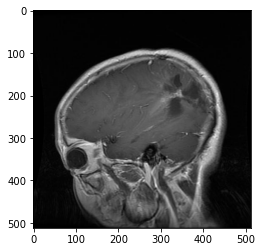

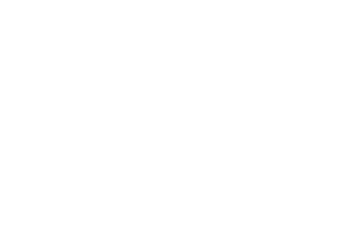

In [47]:
DATADIR = r"/kaggle/input/brain-tumor-classification-mri/Training/"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

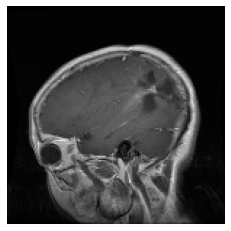

In [48]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [49]:
create_training_data()

In [50]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(2870, 150, 150)


In [20]:
y = to_categorical(y, num_classes = 4)

In [21]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

x_train shape (2296, 150, 150, 1)
x_test shape (574, 150, 150, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


In [44]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3)) 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size) 

Epoch 1/50
57/57 [==============================] - 3s 51ms/step - loss: 1.3073 - accuracy: 0.3856 - val_loss: 1.1464 - val_accuracy: 0.4599
Epoch 2/50
57/57 [==============================] - 2s 41ms/step - loss: 1.0162 - accuracy: 0.5612 - val_loss: 1.1068 - val_accuracy: 0.5174
Epoch 3/50
57/57 [==============================] - 2s 42ms/step - loss: 0.8514 - accuracy: 0.6352 - val_loss: 0.8844 - val_accuracy: 0.6098
Epoch 4/50
57/57 [==============================] - 2s 41ms/step - loss: 0.7246 - accuracy: 0.6840 - val_loss: 1.0293 - val_accuracy: 0.5209
Epoch 5/50
57/57 [==============================] - 2s 41ms/step - loss: 0.6617 - accuracy: 0.7128 - val_loss: 0.8356 - val_accuracy: 0.6429
Epoch 6/50
57/57 [==============================] - 2s 41ms/step - loss: 0.6037 - accuracy: 0.7500 - val_loss: 0.7494 - val_accuracy: 0.6655
Epoch 7/50
57/57 [==============================] - 2s 42ms/step - loss: 0.5439 - accuracy: 0.7797 - val_loss: 0.7608 - val_accuracy: 0.6498
Epoch 8/50
57

In [28]:

# saving model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# saving weights to HDF5
model.save_weights("model.h5")

In [29]:
# Making prediction about user data
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator

In [30]:
# load json and create model
json_file = open('./model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./model.h5")